<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/thermodynamics_of_natural_gas_hydrates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Thermodynamics of natural gas hydrates
#@markdown Demonstration of calulcations related to natura gas hydrates
%%capture
!git clone https://github.com/EvenSol/NeqSim-Colab.git
!pip install NeqSim-Colab/lib/neqsim-*.whl

In [0]:
#@title Import packages
#@markdown Imports packages such as neqsim, numpy, matplotlib etc.
%%capture
import neqsim
import time
time.sleep(3)
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

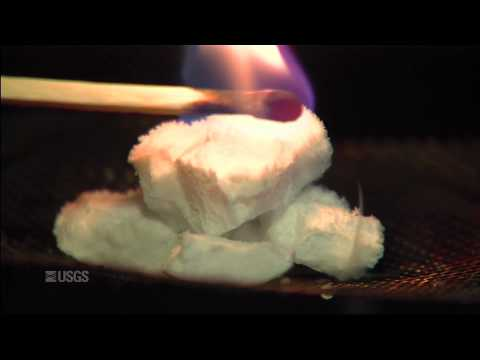

In [3]:
#@title Introduction to Natural gas hydrates
#@markdown This video gives an intriduction to natural gas hydrates
from IPython.display import YouTubeVideo
YouTubeVideo('U46XOoU0DrM', width=600, height=400)



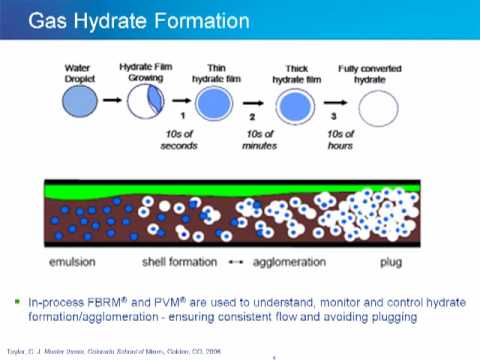

In [2]:
#@markdown This video gives an intriduction to natural gas hydrates in oil and gas production
YouTubeVideo('QEJmhokSmZM', width=600, height=400)

#Hydrate calculations¶
##How to find the hydrate equilibrium temperature
Hydrate temperatures can be found ...

In [0]:
pressure = 150.0 #@param {type:"number"}
nitrogen = 1.5 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 95.0  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
water =  10.25 #@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("water", water
fluid1.setHydrateCheck(True);
thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.hydrateFormationTemperature()

print("Hydrate equilibrium temperature ", fluid1.getTemperature()-273.15, " C")

Hydrate equilibrium temperature  0.35540000000003147  C


##How to draw the hydrate equilibrium line
A hydrate equilibrium line is drawn by calculating a sequence of hydrate equilibrium temperatures.

Text(0, 0.5, 'Pressure [bara]')

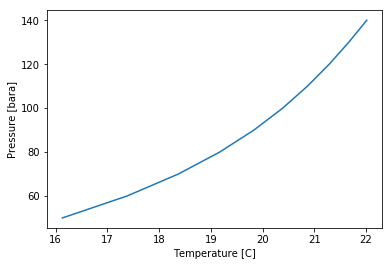

In [0]:
minPressure = 50.0 #@param {type:"number"}
maxPressure = 150.0 #@param {type:"number"}
nitrogen = 1.5 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 95.0  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
water =  10.0 #@param {type:"number"}

fluid1 = fluid('cpa')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("water", water)

fluid1.setHydrateCheck(True);
fluid1.setTemperature(280.0)
thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(fluid1)

def hydrateEqTemp(pressure):
    fluid1.setPressure(pressure)
    thermoOps.hydrateFormationTemperature()
    return fluid1.getTemperature()-273.15

pressure = np.arange(minPressure, maxPressure, 10.0)
temperature = [hydrateEqTemp(P) for P in pressure]

plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')